## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics Module</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

**``In this context, the project consists of 3 parts in general:``**
* **The first part** is related to 'Data Cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, and Dropping useless columns.
* **The second part** is related to 'Filling Data', in other words 'Imputation'. It deals with Missing Values. Categorical to numeric transformation is done as well.
* **The third part** is related to 'Handling Outliers of Data' via Visualization libraries. So, some insights will be extracted.

# AutoScout - Part 2 - `( Handling With Missing Values )`

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import json

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df0 = pd.read_csv("cleaned_AutoScout.csv")

In [3]:
df = df0.copy()

In [4]:
df.shape

(15919, 30)

In [5]:
df.duplicated().sum()

1711

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(14208, 30)

In [8]:
(df.isnull().sum() * 100 / df.shape[0]).sort_values(ascending=False)

Inspection_new        74.367
Warranty              70.024
Weight_kg             43.961
Drive chain           43.870
Previous Owners       40.252
Cylinders             34.783
Upholstery_type       29.603
Gears                 29.082
vat                   28.055
Emission Class        22.832
Extras                17.708
cons_city             15.956
CO2 Emission          15.745
cons_country          15.541
cons_comb             12.697
age                    9.248
entertainment_media    8.073
km                     6.137
Nr. of Seats           5.997
safety_security        5.638
comfort_convenience    5.370
Displacement_cc        2.541
Nr. of Doors           0.985
body_type              0.324
Type                   0.014
Fuel                   0.000
Gearing Type           0.000
kW                     0.000
price                  0.000
make_model             0.000
dtype: float64

In [9]:
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

make_model - 0%
body_type - 0%
price - 0%
vat - 28%
km - 6%
kW - 0%
Type - 0%
Previous Owners - 40%
Warranty - 70%
Nr. of Doors - 1%
Nr. of Seats - 6%
Gearing Type - 0%
Cylinders - 35%
Drive chain - 44%
Fuel - 0%
CO2 Emission - 16%
Emission Class - 23%
comfort_convenience - 5%
entertainment_media - 8%
Extras - 18%
safety_security - 6%
Gears - 29%
Inspection_new - 74%
age - 9%
Upholstery_type - 30%
Displacement_cc - 3%
Weight_kg - 44%
cons_comb - 13%
cons_city - 16%
cons_country - 16%


In [10]:
df.head(3).T

,0,1,2
make_model,Audi A1,Audi A1,Audi A1
body_type,Sedans,Sedans,Sedans
price,15770,14500,14640
vat,VAT deductible,Price negotiable,VAT deductible
km,56013.000,80000.000,83450.000
kW,66.000,141.000,85.000
Type,Used,Used,Used
Previous Owners,2.000,NaN,1.000
Warranty,NaN,NaN,NaN
Nr. of Doors,5.000,3.000,4.000


In [11]:
df.sample(3).T

,10335,1463,12143
make_model,Opel Corsa,Audi A1,Opel Insignia
body_type,Compact,Sedans,Station wagon
price,10250,22980,20980
vat,VAT deductible,VAT deductible,VAT deductible
km,22.000,7987.000,13890.000
kW,51.000,141.000,125.000
Type,Pre-registered,Used,Used
Previous Owners,1.000,1.000,1.000
Warranty,NaN,NaN,NaN
Nr. of Doors,3.000,5.000,5.000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14208 entries, 0 to 15916
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           14208 non-null  object 
 1   body_type            14162 non-null  object 
 2   price                14208 non-null  int64  
 3   vat                  10222 non-null  object 
 4   km                   13336 non-null  float64
 5   kW                   14208 non-null  float64
 6   Type                 14206 non-null  object 
 7   Previous Owners      8489 non-null   float64
 8   Warranty             4259 non-null   float64
 9   Nr. of Doors         14068 non-null  float64
 10  Nr. of Seats         13356 non-null  float64
 11  Gearing Type         14208 non-null  object 
 12  Cylinders            9266 non-null   float64
 13  Drive chain          7975 non-null   object 
 14  Fuel                 14208 non-null  object 
 15  CO2 Emission         11971 non-null 

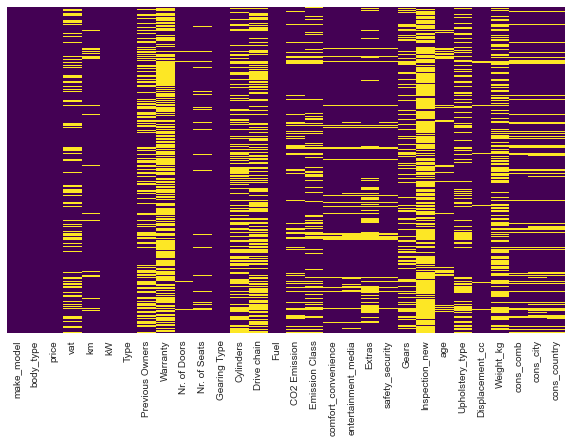

In [13]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [14]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'kW', 'Type',
       'Previous Owners', 'Warranty', 'Nr. of Doors', 'Nr. of Seats',
       'Gearing Type', 'Cylinders', 'Drive chain', 'Fuel', 'CO2 Emission',
       'Emission Class', 'comfort_convenience', 'entertainment_media',
       'Extras', 'safety_security', 'Gears', 'Inspection_new', 'age',
       'Upholstery_type', 'Displacement_cc', 'Weight_kg', 'cons_comb',
       'cons_city', 'cons_country'],
      dtype='object')

In [15]:
# We defined a function that shows the first info of the column

def info(col):
    print("Column Name    : ", col)
    print("--------------------------------")
    print("Number of Nulls       : ", df[col].isnull().sum())
    print("Percentage of Nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("Number of Uniques     : ", df[col].nunique())
    print("--------------------------------\n")
    print(df[col].value_counts(dropna = False))

In [16]:
def fill_with(df, group_col1, group_col2, col_name, method):
    
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if mode2 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
                elif mode1 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
                else:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])
                
    elif method == "mean":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mean()).fillna(df[cond1][col_name].mean()).fillna(df[col_name].mean())


    elif method == "median":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].median()).fillna(df[cond1][col_name].median()).fillna(df[col_name].mean())

    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

How to use ***fill_with(df, group_col1, group_col2, col_name, method)***

***df :***            Data Frame

:***group_col1 :***   col_name values will be grouped according to this column. The values of this column  will be taken for the next phase

:***group_col2 :***  col_name values will be grouped according to this column too. The values of this column  will be taken for the next phase

:***col_name :***    We will fill the rows with 'null' values in this column

:***method :***      Choose a method to fill Null values with "mode", "mean", "median", "ffill"

## - make_model

In [17]:
info("make_model")

Column Name    :  make_model
--------------------------------
Number of Nulls       :  0
Percentage of Nulls   :  % 0.0
Number of Uniques     :  9
--------------------------------

Audi A3           2747
Opel Insignia     2398
Audi A1           2370
Opel Astra        2300
Opel Corsa        2004
Renault Clio      1474
Renault Espace     880
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64


## - age

In [18]:
info('age')

Column Name    :  age
--------------------------------
Number of Nulls       :  1314
Percentage of Nulls   :  % 9.25
Number of Uniques     :  4
--------------------------------

1.000    4277
3.000    3316
2.000    2898
0.000    2403
NaN      1314
Name: age, dtype: int64


In [19]:
df['age'].fillna('-', inplace=True)

In [20]:
df[df["age"] == "-"]["km"].value_counts(dropna=False)

NaN          707
10.000       251
1.000        138
5.000         49
20.000        24
15.000        20
0.000         18
8.000         11
11.000        10
50.000        10
100.000        8
7.000          7
12.000         6
3.000          4
9.000          4
4.000          3
25.000         3
30.000         3
3000.000       2
2.000          2
22627.000      2
99.000         1
497.000        1
784.000        1
89692.000      1
3500.000       1
500.000        1
19500.000      1
4307.000       1
77.000         1
40.000         1
6100.000       1
11000.000      1
89982.000      1
250.000        1
325.000        1
141.000        1
34164.000      1
150.000        1
11200.000      1
20768.000      1
32084.000      1
39962.000      1
142.000        1
81800.000      1
281.000        1
6.000          1
68485.000      1
85000.000      1
196.000        1
4500.000       1
60.000         1
5000.000       1
Name: km, dtype: int64

In [21]:
cond1 = (df['km'] < 10000)
cond2 = ((df['km'] >= 10000) & (df['km'] < 28000))
cond3 = ((df['km'] >= 28000) & (df['km'] < 50000))
cond4 = (df['km'] >= 50000)

In [22]:
df.loc[cond1,'age'] = df.loc[cond1,'age'].replace('-', 0)
df.loc[cond2,'age'] = df.loc[cond2,'age'].replace('-', 1)
df.loc[cond3,'age'] = df.loc[cond3,'age'].replace('-', 2)
df.loc[cond4,'age'] = df.loc[cond4,'age'].replace('-', 3)

In [23]:
df.groupby('age').km.mean()

age
0.0    1921.236
1.0   18092.046
2.0   42284.464
3.0   76602.034
-           NaN
Name: km, dtype: float64

In [24]:
df["age"].value_counts(dropna=False)

1.0    4283
3.0    3321
0.0    2996
2.0    2901
-       707
Name: age, dtype: int64

In [25]:
df.groupby(['make_model',"body_type", 'age']).price.describe()

count      mean      std       min       25%  \
make_model     body_type age                                                  
Audi A1        Compact   0.0 159.000 23447.723 3568.862 14900.000 20980.000   
                         1.0 260.000 18551.104 2645.427 13980.000 16445.000   
                         2.0 132.000 16681.402 2217.591 10999.000 15437.500   
                         3.0 208.000 14475.774 2017.945  9950.000 13372.500   
                         -   129.000 23797.132 3300.765 16220.000 21590.000   
...                              ...       ...      ...       ...       ...   
Renault Espace Van       0.0 185.000 40842.632 8168.042 24200.000 34180.000   
                         1.0 196.000 31930.872 4131.786 23099.000 29385.000   
                         2.0 107.000 26891.028 3748.311 14600.000 24745.000   
                         3.0 196.000 22185.974 3211.093 12614.000 19967.500   
                         -    14.000 39521.714 6729.548 28650.000 35437.500   

                                   50%       75%       max  
make_model     body_type age                                
Audi A1        Compact   0.0 22590.000 26697.000 31990.000  
                         1.0 16969.000 20950.000 23829.000  
                         2.0 15900.000 17970.000 22150.000  
                         3.0 13947.500 15859.750 18900.000  
                         -   22850.000 27040.000 29181.000  
...                                ...       ...       ...  
Renault Espace Van       0.0 39675.000 46660.000 68320.000  
                         1.0 31900.000 34990.000 38990.000  
                         2.0 27289.000 28990.000 33800.000  
                         3.0 22345.000 24712.500 27900.000  
                         -   38420.000 43762.000 50170.000  

[176 rows x 8 columns]

In [26]:
df['age'].replace('-', 0, inplace=True)

In [27]:
df.groupby('age').km.mean()

age
0.000    1921.236
1.000   18092.046
2.000   42284.464
3.000   76602.034
Name: km, dtype: float64

In [28]:
df["age"].value_counts(dropna=False)

1.000    4283
0.000    3703
3.000    3321
2.000    2901
Name: age, dtype: int64

## - km

In [29]:
info('km')

Column Name    :  km
--------------------------------
Number of Nulls       :  872
Percentage of Nulls   :  % 6.14
Number of Uniques     :  6689
--------------------------------

NaN         872
10.000      748
1.000       285
5.000       128
50.000      118
           ... 
3806.000      1
6300.000      1
126.000       1
3339.000      1
57.000        1
Name: km, Length: 6690, dtype: int64


In [30]:
df.groupby(["age", "Fuel"])["km"].describe()

count       mean       std       min       25%       50%  \
age   Fuel                                                                   
0.000 Benzine  2272.000   1800.004  4211.775     0.000    10.000    20.000   
      Diesel    587.000   2409.874  7986.542     0.000    10.000    35.000   
      LPG/CNG     6.000     22.833    28.937     1.000     2.500     7.500   
1.000 Benzine  2511.000  16719.620 10571.141     1.000  8500.000 15980.000   
      Diesel   1732.000  20080.804 11102.235     1.000 13185.750 20446.000   
      Electric    3.000  15560.000  4694.337 12000.000 12900.000 13800.000   
      LPG/CNG     4.000  20400.000  8380.931 11000.000 15500.000 20000.000   
2.000 Benzine  1139.000  31675.277 21111.175     1.000 16300.000 27000.000   
      Diesel   1744.000  49072.793 30672.521     1.000 25959.250 41000.000   
      LPG/CNG    17.000  56697.353 33673.949  2880.000 40000.000 56000.000   
3.000 Benzine  1030.000  49439.860 25400.702  1800.000 31240.000 44735.000   
      Diesel   2268.000  88691.221 38819.360    10.000 60973.000 85336.000   
      Electric    2.000  40431.500 23431.397 23863.000 32147.250 40431.500   
      LPG/CNG    21.000 106654.571 33645.428 51500.000 89000.000 97000.000   

                      75%        max  
age   Fuel                            
0.000 Benzine    2500.000 105000.000  
      Diesel     2700.000 127022.000  
      LPG/CNG      47.000     60.000  
1.000 Benzine   24410.500  80009.000  
      Diesel    26169.500 136000.000  
      Electric  17340.000  20880.000  
      LPG/CNG   24900.000  30600.000  
2.000 Benzine   44094.000 317000.000  
      Diesel    68000.500 240000.000  
      LPG/CNG   77000.000 120000.000  
3.000 Benzine   64186.750 146210.000  
      Diesel   110051.250 291800.000  
      Electric  48715.750  57000.000  
      LPG/CNG  122000.000 175000.000

In [31]:
fill_with(df, "age", "Fuel", "km", "mean")

Number of NaN :  0
------------------
10.000      748
1800.004    605
1.000       285
2409.874    222
5.000       128
           ... 
2890.000      1
3806.000      1
6300.000      1
126.000       1
57.000        1
Name: km, Length: 6695, dtype: int64


## - body_type

In [32]:
info("body_type")

Column Name    :  body_type
--------------------------------
Number of Nulls       :  46
Percentage of Nulls   :  % 0.32
Number of Uniques     :  9
--------------------------------

Sedans           7104
Station wagon    3275
Compact          2623
Van               703
Other             281
Transporter        87
Off-Road           56
NaN                46
Coupe              25
Convertible         8
Name: body_type, dtype: int64


In [33]:
df["body_type"].replace("Other", np.nan, inplace=True)

In [34]:
df.groupby(["make_model", "age", "body_type"]).price.describe().T

make_model   Audi A1                                                        \
age            0.000                                       1.000             
body_type    Compact    Sedans Station wagon       Van   Compact    Sedans   
count        288.000   381.000         2.000     1.000   260.000   451.000   
mean       23604.229 24023.152     28944.500 29000.000 18551.104 18345.756   
std         3449.825  3312.683        77.075       NaN  2645.427  2543.515   
min        14900.000 15980.000     28890.000 29000.000 13980.000 13450.000   
25%        21097.500 21700.000     28917.250 29000.000 16445.000 16300.000   
50%        22740.000 23400.000     28944.500 29000.000 16969.000 16949.000   
75%        26980.000 26890.000     28971.750 29000.000 20950.000 19999.000   
max        31990.000 37900.000     28999.000 29000.000 23829.000 33900.000   

make_model                                                            \
age                          2.000                                     
body_type  Station wagon   Compact     Coupe    Sedans Station wagon   
count             11.000   132.000     1.000   261.000         3.000   
mean           17410.909 16681.402 15900.000 16629.789     17613.333   
std             2166.031  2217.591       NaN  2215.336      2953.817   
min            15750.000 10999.000 15900.000 11600.000     14750.000   
25%            15870.000 15437.500 15900.000 14990.000     16095.000   
50%            16480.000 15900.000 15900.000 15900.000     17440.000   
75%            18260.000 17970.000 15900.000 18000.000     19045.000   
max            21450.000 22150.000 15900.000 22500.000     20650.000   

make_model                                               Audi A2   Audi A3  \
age            3.000                                       1.000     0.000   
body_type    Compact     Coupe    Sedans Station wagon  Off-Road   Compact   
count        208.000     1.000   354.000         5.000     1.000    20.000   
mean       14475.774 13950.000 14397.582     14358.000 28200.000 28285.400   
std         2017.945       NaN  1945.198      1276.891       NaN  8047.047   
min         9950.000 13950.000  8999.000     12950.000 28200.000 15500.000   
25%        13372.500 13950.000 12990.000     13979.000 28200.000 22581.250   
50%        13947.500 13950.000 13900.000     13999.000 28200.000 25064.000   
75%        15859.750 13950.000 15800.000     14440.000 28200.000 37129.500   
max        18900.000 13950.000 19900.000     16422.000 28200.000 41495.000   

make_model                                                          \
age                                    1.000                         
body_type     Sedans Station wagon   Compact Convertible    Sedans   
count        527.000       101.000    29.000       3.000   663.000   
mean       24881.349     24695.119 22030.931   29664.333 22635.910   
std         2558.293      4324.332  4270.469   23557.901  5383.173   
min        18820.000     17990.000 14500.000   10893.000 14250.000   
25%        23600.000     23290.000 19999.000   16446.500 20862.000   
50%        24900.000     24440.000 21900.000   22000.000 21500.000   
75%        26200.000     25475.000 22599.000   39050.000 22900.000   
max        62900.000     63900.000 39959.000   56100.000 74600.000   

make_model                                                          \
age                          2.000                                   
body_type  Station wagon   Compact Convertible     Coupe    Sedans   
count             31.000    39.000       4.000     1.000   525.000   
mean           21246.258 20489.769   28562.500 19000.000 20020.055   
std             3254.131  8208.445    5301.159       NaN  3796.406   
min             5555.000 13790.000   20900.000 19000.000 10550.000   
25%            20600.000 17525.000   27350.000 19000.000 17999.000   
50%            21480.000 18945.000   30200.000 19000.000 19444.000   
75%            22900.000 20780.000   31412.500 19000.000 20999.000   
max            238

In [35]:
fill_with(df, "make_model", "age", "body_type", "mode")

Number of NaN :  0
------------------
Sedans           7260
Station wagon    3349
Compact          2692
Van               731
Transporter        87
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64


## - Type

In [36]:
info('Type')

Column Name    :  Type
--------------------------------
Number of Nulls       :  2
Percentage of Nulls   :  % 0.01
Number of Uniques     :  5
--------------------------------

Used              10145
New                1363
Pre-registered     1028
Employee's car      903
Demonstration       767
NaN                   2
Name: Type, dtype: int64


In [37]:
fill_with(df, "make_model", "age", "Type", "mode")

Number of NaN :  0
------------------
Used              10146
New                1364
Pre-registered     1028
Employee's car      903
Demonstration       767
Name: Type, dtype: int64


## - Previous Owners

In [38]:
info('Previous Owners')

Column Name    :  Previous Owners
--------------------------------
Number of Nulls       :  5719
Percentage of Nulls   :  % 40.25
Number of Uniques     :  5
--------------------------------

1.000    7650
NaN      5719
2.000     642
0.000     178
3.000      17
4.000       2
Name: Previous Owners, dtype: int64


In [39]:
df.groupby(['make_model', 'body_type', 'age', 'Previous Owners']).price.describe()

count      mean      std  \
make_model     body_type age   Previous Owners                              
Audi A1        Compact   0.000 0.000            11.000 22466.273 2298.725   
                               1.000            75.000 23492.293 3466.692   
                               2.000             1.000 21760.000      NaN   
                         1.000 1.000           192.000 18110.318 2390.177   
                               2.000             5.000 19261.800 2528.799   
...                                                ...       ...      ...   
Renault Espace Van       2.000 1.000            29.000 25965.172 3687.371   
                               2.000            11.000 27272.091 3605.443   
                         3.000 0.000             1.000 24900.000      NaN   
                               1.000           100.000 21678.720 3571.088   
                               2.000            14.000 23641.000 2699.715   

                                                     min       25%       50%  \
make_model     body_type age   Previous Owners                                 
Audi A1        Compact   0.000 0.000           19490.000 21299.500 22400.000   
                               1.000           14900.000 21410.000 22900.000   
                               2.000           21760.000 21760.000 21760.000   
                         1.000 1.000           13980.000 16430.000 16930.000   
                               2.000           16960.000 16980.000 18470.000   
...                                                  ...       ...       ...   
Renault Espace Van       2.000 1.000           16950.000 23990.000 26990.000   
                               2.000           19450.000 25570.000 27289.000   
                         3.000 0.000           24900.000 24900.000 24900.000   
                               1.000           12614.000 19009.750 21982.500   
                               2.000           19490.000 21474.250 23495.000   

                                                     75%       max  
make_model     body_type age   Previous Owners                      
Audi A1        Compact   0.000 0.000           22720.000 28650.000  
                               1.000           26290.000 29179.000  
                               2.000           21760.000 21760.000  
                         1.000 1.000           19988.500 23829.000  
                               2.000           21949.000 21950.000  
...                                                  ...       ...  
Renault Espace Van       2.000 1.000           28900.000 31775.000  
                               2.000           28925.000 33285.000  
                         3.000 0.000           24900.000 24900.000  
                               1.000           24637.500 27900.000  
                               2.000           25933.750 27900.000  

[211 rows x 8 columns]

In [40]:
df.groupby(['make_model', 'age', 'Previous Owners']).km.describe()

count      mean       std       min  \
make_model     age   Previous Owners                                         
Audi A1        0.000 0.000            40.000   967.624   922.368     0.000   
                     1.000           220.000  3253.482  3503.854     1.000   
                     2.000             1.000  3000.000       NaN  3000.000   
               1.000 0.000             1.000 15000.000       NaN 15000.000   
                     1.000           490.000 13767.317  8121.439    20.000   
...                                      ...       ...       ...       ...   
Renault Espace 3.000 0.000             1.000 91883.000       NaN 91883.000   
                     1.000           115.000 78429.626 36173.023  3532.000   
                     2.000            20.000 55316.250 27356.183  7300.000   
                     3.000             1.000 40000.000       NaN 40000.000   
                     4.000             1.000 57000.000       NaN 57000.000   

                                           25%       50%       75%        max  
make_model     age   Previous Owners                                           
Audi A1        0.000 0.000               7.000  1800.004  1800.004   2409.874  
                     1.000              50.000  3000.000  5000.000  18000.000  
                     2.000            3000.000  3000.000  3000.000   3000.000  
               1.000 0.000           15000.000 15000.000 15000.000  15000.000  
                     1.000            6894.000 11259.000 21090.000  35500.000  
...                                        ...       ...       ...        ...  
Renault Espace 3.000 0.000           91883.000 91883.000 91883.000  91883.000  
                     1.000           54448.000 76000.000 98000.000 197414.000  
                     2.000           42536.750 51972.500 64921.250 148000.000  
                     3.000           40000.000 40000.000 40000.000  40000.000  
                     4.000           57000.000 57000.000 57000.000  57000.000  

[91 rows x 8 columns]

In [41]:
fill_with(df, "make_model", "age", "Previous Owners", "ffill")

Number of NaN :  0
------------------
1.000    12656
2.000     1007
0.000      513
3.000       30
4.000        2
Name: Previous Owners, dtype: int64


## - Warranty

In [42]:
info('Warranty')

Column Name    :  Warranty
--------------------------------
Number of Nulls       :  9949
Percentage of Nulls   :  % 70.02
Number of Uniques     :  41
--------------------------------

NaN       9949
12.000    2242
24.000    1007
60.000     391
36.000     178
48.000     132
6.000      125
72.000      58
3.000       33
18.000      10
23.000      10
20.000       7
25.000       6
2.000        5
50.000       4
16.000       4
4.000        3
1.000        3
19.000       3
34.000       3
26.000       3
13.000       3
28.000       2
22.000       2
14.000       2
11.000       2
46.000       2
21.000       2
9.000        2
17.000       2
45.000       2
33.000       1
40.000       1
65.000       1
10.000       1
15.000       1
7.000        1
8.000        1
56.000       1
49.000       1
47.000       1
30.000       1
Name: Warranty, dtype: int64


In [43]:
df.groupby(["Warranty"])['price'].describe(include='O')

,count,mean,std,min,25%,50%,75%,max
Warranty,,,,,,,,
1.000,3.000,18383.333,4269.292,13455.000,17100.000,20745.000,20847.500,20950.000
2.000,5.000,14604.000,2709.369,10750.000,12990.000,15290.000,16990.000,17000.000
3.000,33.000,16278.212,8782.362,5800.000,8900.000,14950.000,17990.000,39990.000
4.000,3.000,19666.667,7922.331,11200.000,16050.000,20900.000,23900.000,26900.000
6.000,125.000,14608.704,6033.523,5900.000,8790.000,13990.000,18900.000,33800.000
7.000,1.000,21480.000,NaN,21480.000,21480.000,21480.000,21480.000,21480.000
8.000,1.000,17500.000,NaN,17500.000,17500.000,17500.000,17500.000,17500.000
9.000,2.000,10797.500,0.707,10797.000,10797.250,10797.500,10797.750,10798.000
10.000,1.000,19990.000,NaN,19990.000,19990.000,19990.000,19990.000,19990.000


In [44]:
df.drop("Warranty", axis=1, inplace=True)

# It has too much null values and there is no relation between Warranty and Price

## - Nr. of Doors

In [45]:
info('Nr. of Doors')

Column Name    :  Nr. of Doors
--------------------------------
Number of Nulls       :  140
Percentage of Nulls   :  % 0.99
Number of Uniques     :  6
--------------------------------

5.000    10361
4.000     2763
3.000      748
2.000      194
NaN        140
1.000        1
7.000        1
Name: Nr. of Doors, dtype: int64


In [46]:
fill_with(df, "make_model", "body_type", "Nr. of Doors", "mode")

Number of NaN :  0
------------------
5.000    10501
4.000     2763
3.000      748
2.000      194
1.000        1
7.000        1
Name: Nr. of Doors, dtype: int64


## - Nr. of Seats

In [47]:
info("Nr. of Seats")

Column Name    :  Nr. of Seats
--------------------------------
Number of Nulls       :  852
Percentage of Nulls   :  % 6.0
Number of Uniques     :  6
--------------------------------

5.000    11889
4.000     1069
NaN        852
7.000      309
2.000       86
6.000        2
3.000        1
Name: Nr. of Seats, dtype: int64


In [48]:
fill_with(df, "make_model", "body_type", "Nr. of Seats", "mode")

Number of NaN :  0
------------------
5.000    12736
4.000     1071
7.000      309
2.000       89
6.000        2
3.000        1
Name: Nr. of Seats, dtype: int64


## - Gearing_Type

In [49]:
info('Gearing Type')

Column Name    :  Gearing Type
--------------------------------
Number of Nulls       :  0
Percentage of Nulls   :  % 0.0
Number of Uniques     :  3
--------------------------------

Manual            7218
Automatic         6526
Semi-automatic     464
Name: Gearing Type, dtype: int64


## - Cylinders

In [50]:
info('Cylinders')

Column Name    :  Cylinders
--------------------------------
Number of Nulls       :  4942
Percentage of Nulls   :  % 34.78
Number of Uniques     :  7
--------------------------------

4.000    7327
NaN      4942
3.000    1909
5.000      22
6.000       3
8.000       2
2.000       2
1.000       1
Name: Cylinders, dtype: int64


In [51]:
fill_with(df, "make_model", "Weight_kg", "Cylinders", "ffill")

Number of NaN :  0
------------------
4.000    11277
3.000     2890
5.000       26
8.000        5
2.000        5
6.000        3
1.000        2
Name: Cylinders, dtype: int64


In [52]:
df.drop('Cylinders', axis=1, inplace=True)  

# It has similar values with kW, but more null values,so we don't need this column.

## - Drive_Chain

In [53]:
info('Drive chain')

Column Name    :  Drive chain
--------------------------------
Number of Nulls       :  6233
Percentage of Nulls   :  % 43.87
Number of Uniques     :  3
--------------------------------

front    7823
NaN      6233
4WD       148
rear        4
Name: Drive chain, dtype: int64


In [54]:
df.groupby(["make_model", "body_type", "Drive chain"]).price.describe()

count      mean       std  \
make_model     body_type     Drive chain                                
Audi A1        Compact       4WD            2.000 14790.000  1258.650   
                             front        598.000 19509.273  4394.196   
               Sedans        4WD            1.000 15450.000       NaN   
                             front        943.000 19067.348  4439.548   
               Station wagon front         18.000 16681.111  2493.673   
               Van           front          1.000 29000.000       NaN   
Audi A2        Off-Road      front          1.000 28200.000       NaN   
Audi A3        Compact       4WD            1.000 67600.000       NaN   
                             front        121.000 20125.587  6025.596   
               Convertible   4WD            1.000 56100.000       NaN   
                             front          3.000 20897.667 10003.500   
               Coupe         front          3.000 17996.667  1005.004   
               Sedans        4WD           17.000 32913.765 20353.178   
                             front       1455.000 21094.896  3555.099   
               Station wagon front        125.000 21018.736  3604.683   
Opel Astra     Compact       front         64.000 15571.859  5733.873   
               Off-Road      front          1.000 18590.000       NaN   
               Sedans        4WD            2.000 13075.000  3641.600   
                             front        519.000 16290.426  4567.118   
               Station wagon front        649.000 16472.407  5404.696   
Opel Corsa     Compact       front        527.000 12599.979  3039.884   
               Coupe         front          7.000  8407.143  1342.395   
               Sedans        front        495.000 10539.424  2733.264   
               Transporter   front          6.000  7175.000  2073.343   
Opel Insignia  Compact       front          9.000 30355.556 11565.386   
               Off-Road      4WD            5.000 28232.800  8948.569   
                             front          1.000 31505.000       NaN   
               Sedans        4WD           23.000 34419.913  6866.612   
                             front        418.000 22374.859  7453.599   
                             rear           1.000 18990.000       NaN   
               Station wagon 4WD           60.000 27314.167 10725.826   
                             front        815.000 22351.109  7742.235   
                             rear           2.000 15925.000  4277.996   
               Van           front          1.000 20980.000       NaN   
Renault Clio   Compact       4WD            1.000  9680.000       NaN   
                             front        164.000 12881.037  4454.685   
               Coupe         front          1.000 17990.000       NaN   
               Off-Road      front          1.000 17990.000       NaN   
               Sedans        4WD            8.000 23021.000     0.000   
                             front        347.000 11984.611  4080.771   
                             rear           1.000 10490.000       NaN   
               Station wagon 4WD            1.000 15798.000       NaN   
                             front        111.000 10979.613  2849.434   
               Transporter   front          7.000  8443.857  1420.587   
               Van           front          1.000  9400.000       NaN   
Renault Duster Off-Road      4WD            2.000 11425.000   813.173   
Renault Espace Compact       front          1.000 21900.000       NaN   
               Off-Road      front          3.000 21033.333  5547.372   
               Sedans        front          4.000 26997.500  3736.758   
               Station wagon 4WD            1.000 35990.000       NaN   
                             front         45.000 30388.222  9592.259   
               Transporter   4WD            1.000 30000.000       NaN   
                             front          6.000 23258.167  5973.317   
               Van           

In [55]:
fill_with(df, 'body_type', 'make_model', 'Drive chain', 'mode')

Number of NaN :  0
------------------
front    14020
4WD        184
rear         4
Name: Drive chain, dtype: int64


## - Fuel

In [56]:
info('Fuel')

Column Name    :  Fuel
--------------------------------
Number of Nulls       :  0
Percentage of Nulls   :  % 0.0
Number of Uniques     :  4
--------------------------------

Benzine     7566
Diesel      6578
LPG/CNG       59
Electric       5
Name: Fuel, dtype: int64


## - Emission_Class

In [57]:
info('Emission Class')

Column Name    :  Emission Class
--------------------------------
Number of Nulls       :  3244
Percentage of Nulls   :  % 22.83
Number of Uniques     :  6
--------------------------------

Euro6          9134
NaN            3244
Euro6d-TEMP    1531
Euro6c          120
Euro5            78
Euro6d           61
Euro4            40
Name: Emission Class, dtype: int64


In [58]:
df.groupby(["make_model", "age", "Fuel", "Emission Class"]).price.describe()

count      mean      std  \
make_model     age   Fuel    Emission Class                              
Audi A1        0.000 Benzine Euro6          228.000 24259.232 3289.866   
                             Euro6d           5.000 21510.000  356.371   
                             Euro6d-TEMP    211.000 23572.398 3671.528   
                     Diesel  Euro6            4.000 19370.000 1181.891   
               1.000 Benzine Euro5            3.000 17862.667 1840.593   
...                                             ...       ...      ...   
Renault Espace 3.000 Diesel  Euro5            1.000 24900.000      NaN   
                             Euro6          173.000 21630.653 3423.880   
                             Euro6c           1.000 17000.000      NaN   
                             Euro6d           1.000 17900.000      NaN   
                             Euro6d-TEMP      3.000 22496.667 1320.997   

                                                  min       25%       50%  \
make_model     age   Fuel    Emission Class                                 
Audi A1        0.000 Benzine Euro6          15550.000 21800.000 23473.500   
                             Euro6d         20990.000 21490.000 21490.000   
                             Euro6d-TEMP    16985.000 20892.500 22500.000   
                     Diesel  Euro6          17900.000 18717.500 19495.000   
               1.000 Benzine Euro5          16800.000 16800.000 16800.000   
...                                               ...       ...       ...   
Renault Espace 3.000 Diesel  Euro5          24900.000 24900.000 24900.000   
                             Euro6          12614.000 19490.000 21400.000   
                             Euro6c         17000.000 17000.000 17000.000   
                             Euro6d         17900.000 17900.000 17900.000   
                             Euro6d-TEMP    21000.000 21995.000 22990.000   

                                                  75%       max  
make_model     age   Fuel    Emission Class                      
Audi A1        0.000 Benzine Euro6          27492.500 29197.000  
                             Euro6d         21590.000 21990.000  
                             Euro6d-TEMP    26890.000 37900.000  
                     Diesel  Euro6          20147.500 20590.000  
               1.000 Benzine Euro5          18394.000 19988.000  
...                                               ...       ...  
Renault Espace 3.000 Diesel  Euro5          24900.000 24900.000  
                             Euro6          24700.000 30000.000  
                             Euro6c         17000.000 17000.000  
                             Euro6d         17900.000 17900.000  
                             Euro6d-TEMP    23245.000 23500.000  

[181 rows x 8 columns]

In [59]:
df.drop("Emission Class", axis=1, inplace=True)

## - comfort_convenience

In [60]:
info('comfort_convenience')

Column Name    :  comfort_convenience
--------------------------------
Number of Nulls       :  763
Percentage of Nulls   :  % 5.37
Number of Uniques     :  6198
--------------------------------

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  763
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                         

In [61]:
fill_with(df,'make_model', 'body_type', 'comfort_convenience', 'mode')

Number of NaN :  0
------------------
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                                   321
Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Leather steering wheel,Light sensor,Lumbar support,Multi-function steering wheel,Navigation system,Park Distance Control,Parking assist system sensors front,Parking assist system sensors rear,Power windows,Rain sensor,Seat heating,Start-stop system                                                                                                                                       

## - entertainment_media

In [62]:
info('entertainment_media')

Column Name    :  entertainment_media
--------------------------------
Number of Nulls       :  1147
Percentage of Nulls   :  % 8.07
Number of Uniques     :  346
--------------------------------

Bluetooth,Hands-free equipment,On-board computer,Radio,USB                  1186
NaN                                                                         1147
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB               929
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB     692
On-board computer,Radio                                                      437
                                                                            ... 
Bluetooth,CD player,Digital radio,Hands-free equipment,Radio                   1
CD player,Hands-free equipment,MP3,Radio,USB                                   1
MP3,Radio,Sound system,USB                                                     1
Hands-free equipment,On-board computer,Radio,Sound system                  

In [63]:
fill_with(df, 'make_model', 'body_type', 'entertainment_media', 'mode')

Number of NaN :  0
------------------
Bluetooth,Hands-free equipment,On-board computer,Radio,USB                  1549
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB              1059
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB     808
On-board computer                                                            524
Radio                                                                        495
                                                                            ... 
Bluetooth,CD player,Digital radio,Hands-free equipment,Radio                   1
CD player,Hands-free equipment,MP3,Radio,USB                                   1
MP3,Radio,Sound system,USB                                                     1
Bluetooth,MP3,On-board computer,Sound system,USB                               1
CD player,Digital radio,Radio                                                  1
Name: entertainment_media, Length: 346, dtype: int64


## - Extras

In [64]:
info('Extras')

Column Name    :  Extras
--------------------------------
Number of Nulls       :  2516
Percentage of Nulls   :  % 17.71
Number of Uniques     :  659
--------------------------------

Alloy wheels                                                                                               2837
NaN                                                                                                        2516
Alloy wheels,Touch screen                                                                                   609
Alloy wheels,Voice Control                                                                                  529
Alloy wheels,Touch screen,Voice Control                                                                     507
                                                                                                           ... 
Alloy wheels,Handicapped enabled,Shift paddles,Voice Control                                                  1
Alloy wheels,Handicapped enabled

In [65]:
fill_with(df, 'make_model', 'body_type', 'Extras', 'mode')

Number of NaN :  0
------------------
Alloy wheels                                                                                               5018
Alloy wheels,Touch screen                                                                                   609
Alloy wheels,Voice Control                                                                                  529
Alloy wheels,Touch screen,Voice Control                                                                     515
Roof rack                                                                                                   481
                                                                                                           ... 
Alloy wheels,Handicapped enabled,Shift paddles,Voice Control                                                  1
Alloy wheels,Handicapped enabled,Shift paddles                                                                1
Alloy wheels,Catalytic Converter,Shift paddles,Sport package,Sport

## - safety_security

In [66]:
info('safety_security')

Column Name    :  safety_security
--------------------------------
Number of Nulls       :  801
Percentage of Nulls   :  % 5.64
Number of Uniques     :  4443
--------------------------------

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                  801
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                                                   

In [67]:
fill_with(df, 'make_model', 'body_type', 'safety_security', 'mode')

Number of NaN :  0
------------------
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                                                                                                                                          628
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                                                                                                                                                     439
ABS,Central do

## - Gears

In [68]:
info('Gears')

Column Name    :  Gears
--------------------------------
Number of Nulls       :  4132
Percentage of Nulls   :  % 29.08
Number of Uniques     :  10
--------------------------------

6.000     5231
NaN       4132
5.000     2917
7.000     1720
8.000      197
9.000        4
1.000        2
3.000        2
2.000        1
50.000       1
4.000        1
Name: Gears, dtype: int64


In [69]:
for group1 in list(df["make_model"].unique()):
    for group2 in list(df["body_type"].unique()):
        for group3 in list(df["Gearing Type"].unique()):
            cond1 = df["make_model"] == group1
            cond2 = (df["make_model"] == group1) & (df["body_type"] == group2)
            cond3 = (df["make_model"] == group1) & (
                df["body_type"] == group2) & (df["Gearing Type"] == group3)
            mode1 = list(df[cond1]["Gears"].mode())
            mode2 = list(df[cond2]["Gears"].mode())
            mode3 = list(df[cond3]["Gears"].mode())
            if mode3 != []:
                df.loc[cond3, "Gears"] = df.loc[cond3, "Gears"].fillna(
                    df[cond3]["Gears"].mode()[0])
            elif mode2 != []:
                df.loc[cond3, "Gears"] = df.loc[cond3, "Gears"].fillna(
                    df[cond2]["Gears"].mode()[0])
            elif mode1 != []:
                df.loc[cond3, "Gears"] = df.loc[cond3, "Gears"].fillna(
                    df[cond1]["Gears"].mode()[0])
            else:
                df.loc[cond3,
                       "Gears"] = df.loc[cond3,
                                         "Gears"].fillna(df["Gears"].mode()[0])

In [70]:
df["Gears"].value_counts(dropna=False)

6.000     7724
5.000     3766
7.000     2509
8.000      198
9.000        4
1.000        2
3.000        2
2.000        1
50.000       1
4.000        1
Name: Gears, dtype: int64

In [71]:
df.groupby(["make_model", "body_type", "Gearing Type", "Gears"]).price.describe()

count      mean      std  \
make_model     body_type Gearing Type   Gears                              
Audi A1        Compact   Automatic      5.000   3.000 22184.333 3421.302   
                                        6.000   6.000 21038.333 4282.039   
                                        7.000 377.000 21750.671 4249.967   
                                        8.000   1.000 16880.000      NaN   
                         Manual         5.000 445.000 16322.427 3086.405   
...                                               ...       ...      ...   
Renault Espace Van       Automatic      9.000   4.000 51389.500 2987.877   
                         Manual         6.000  63.000 23669.651 6902.258   
                                        7.000   1.000 36590.000      NaN   
                         Semi-automatic 6.000  15.000 28234.667 9957.376   
                                        7.000   1.000 19900.000      NaN   

                                                    min       25%       50%  \
make_model     body_type Gearing Type   Gears                                 
Audi A1        Compact   Automatic      5.000 18497.000 20648.500 22800.000   
                                        6.000 16430.000 18725.000 20920.000   
                                        7.000 13880.000 18400.000 21275.000   
                                        8.000 16880.000 16880.000 16880.000   
                         Manual         5.000  9950.000 13980.000 15900.000   
...                                                 ...       ...       ...   
Renault Espace Van       Automatic      9.000 48765.000 49016.250 50905.500   
                         Manual         6.000 12614.000 18970.000 21995.000   
                                        7.000 36590.000 36590.000 36590.000   
                         Semi-automatic 6.000 16900.000 22950.000 24900.000   
                                        7.000 19900.000 19900.000 19900.000   

                                                    75%       max  
make_model     body_type Gearing Type   Gears                      
Audi A1        Compact   Automatic      5.000 24028.000 25256.000  
                                        6.000 21060.000 28860.000  
                                        7.000 24990.000 29197.000  
                                        8.000 16880.000 16880.000  
                         Manual         5.000 16920.000 22990.000  
...                                                 ...       ...  
Renault Espace Van       Automatic      9.000 53278.750 54982.000  
                         Manual         6.000 26220.000 47990.000  
                                        7.000 36590.000 36590.000  
                         Semi-automatic 6.000 31745.000 56950.000  
                                        7.000 19900.000 19900.000  

[160 rows x 8 columns]

## - kW

In [72]:
info('kW')

Column Name    :  kW
--------------------------------
Number of Nulls       :  0
Percentage of Nulls   :  % 0.0
Number of Uniques     :  81
--------------------------------

85.000     2228
66.000     1943
81.000     1250
100.000    1228
110.000    1007
           ... 
84.000        1
195.000       1
44.000        1
239.000       1
137.000       1
Name: kW, Length: 81, dtype: int64


## - Inspection_new

In [73]:
info('Inspection_new')

Column Name    :  Inspection_new
--------------------------------
Number of Nulls       :  10566
Percentage of Nulls   :  % 74.37
Number of Uniques     :  1
--------------------------------

NaN    10566
Yes     3642
Name: Inspection_new, dtype: int64


In [74]:
df.groupby(["make_model", "body_type", "age", "Inspection_new"]).price.describe()

count      mean      std  \
make_model     body_type age   Inspection_new                              
Audi A1        Compact   0.000 Yes            105.000 23033.190 3239.145   
                         1.000 Yes            116.000 18016.466 2303.405   
                         2.000 Yes             45.000 16969.844 2244.910   
                         3.000 Yes            106.000 14275.811 1923.911   
               Sedans    0.000 Yes             64.000 23645.109 3753.003   
...                                               ...       ...      ...   
Renault Espace Off-Road  1.000 Yes              1.000 27850.000      NaN   
               Van       0.000 Yes             77.000 36592.896 5847.107   
                         1.000 Yes             30.000 33362.467 3372.482   
                         2.000 Yes              2.000 27139.500  211.425   
                         3.000 Yes             29.000 21907.345 3698.185   

                                                    min       25%       50%  \
make_model     body_type age   Inspection_new                                 
Audi A1        Compact   0.000 Yes            14900.000 20990.000 22490.000   
                         1.000 Yes            13980.000 16445.000 16910.000   
                         2.000 Yes            12490.000 15590.000 15980.000   
                         3.000 Yes             9950.000 12922.500 13925.000   
               Sedans    0.000 Yes            15990.000 20911.250 22984.500   
...                                                 ...       ...       ...   
Renault Espace Off-Road  1.000 Yes            27850.000 27850.000 27850.000   
               Van       0.000 Yes            28465.000 31975.000 34980.000   
                         1.000 Yes            29385.000 30690.000 31940.000   
                         2.000 Yes            26990.000 27064.750 27139.500   
                         3.000 Yes            12614.000 20990.000 21990.000   

                                                    75%       max  
make_model     body_type age   Inspection_new                      
Audi A1        Compact   0.000 Yes            24900.000 29197.000  
                         1.000 Yes            19988.500 23829.000  
                         2.000 Yes            17998.000 21490.000  
                         3.000 Yes            15443.750 18880.000  
               Sedans    0.000 Yes            27370.000 29137.000  
...                                                 ...       ...  
Renault Espace Off-Road  1.000 Yes            27850.000 27850.000  
               Van       0.000 Yes            40970.000 54120.000  
                         1.000 Yes            35510.000 38990.000  
                         2.000 Yes            27214.250 27289.000  
                         3.000 Yes            24900.000 26970.000  

[75 rows x 8 columns]

In [75]:
df["Inspection_new"].fillna("No", inplace=True) 

# If there is no given information in this column, it is most probably 'no'.

In [76]:
df["Inspection_new"].value_counts(dropna=False)

No     10566
Yes     3642
Name: Inspection_new, dtype: int64

## - Upholstery_type

In [77]:
info('Upholstery_type')

Column Name    :  Upholstery_type
--------------------------------
Number of Nulls       :  4206
Percentage of Nulls   :  % 29.6
Number of Uniques     :  5
--------------------------------

Cloth           7605
NaN             4206
Part leather    1346
Full leather     936
Velour            58
alcantara         57
Name: Upholstery_type, dtype: int64


In [78]:
fill_with(df,'make_model', 'body_type', 'Upholstery_type', 'mode')

Number of NaN :  0
------------------
Cloth           11447
Part leather     1355
Full leather     1291
Velour             58
alcantara          57
Name: Upholstery_type, dtype: int64


## - Displacement_cc

In [79]:
info('Displacement_cc')

Column Name    :  Displacement_cc
--------------------------------
Number of Nulls       :  361
Percentage of Nulls   :  % 2.54
Number of Uniques     :  77
--------------------------------

1598.000    4353
999.000     2207
1398.000    1217
1399.000     659
1956.000     635
            ... 
122.000        1
1198.000       1
1195.000       1
2967.000       1
1800.000       1
Name: Displacement_cc, Length: 78, dtype: int64


In [80]:
df.groupby(["make_model", "kW","Displacement_cc"]).price.describe()

count      mean      std       min  \
make_model     kW      Displacement_cc                                        
Audi A1        0.000   999.000           1.000 22750.000      NaN 22750.000   
               60.000  929.000           4.000 15735.000  617.819 14980.000   
                       999.000         150.000 15194.107 1658.995 10900.000   
               66.000  1422.000        425.000 15793.228 2269.160 10490.000   
                       1596.000          1.000 15585.000      NaN 15585.000   
...                                        ...       ...      ...       ...   
Renault Espace 165.000 1618.000          2.000 37484.500 2114.956 35989.000   
                       1798.000        168.000 37885.607 7715.249 26800.000   
                       1800.000          1.000 50750.000      NaN 50750.000   
               167.000 1798.000          2.000 37990.000 2828.427 35990.000   
               168.000 1798.000          3.000 38410.000 1712.659 36590.000   

                                             25%       50%       75%       max  
make_model     kW      Displacement_cc                                          
Audi A1        0.000   999.000         22750.000 22750.000 22750.000 22750.000  
               60.000  929.000         15355.000 15860.000 16240.000 16240.000  
                       999.000         13992.500 15552.500 15990.000 22390.000  
               66.000  1422.000        13990.000 15950.000 16870.000 23700.000  
                       1596.000        15585.000 15585.000 15585.000 15585.000  
...                                          ...       ...       ...       ...  
Renault Espace 165.000 1618.000        36736.750 37484.500 38232.250 38980.000  
                       1798.000        31990.000 35935.000 40977.250 64332.000  
                       1800.000        50750.000 50750.000 50750.000 50750.000  
               167.000 1798.000        36990.000 37990.000 38990.000 39990.000  
               168.000 1798.000        37620.000 38650.000 39320.000 39990.000  

[310 rows x 8 columns]

In [81]:
fill_with(df, 'make_model', 'kW', 'Displacement_cc', 'mode')

Number of NaN :  0
------------------
1598.000    4505
999.000     2234
1398.000    1242
1399.000     674
1956.000     651
            ... 
122.000        1
1198.000       1
1195.000       1
2967.000       1
1800.000       1
Name: Displacement_cc, Length: 77, dtype: int64


## - Weight_kg

In [82]:
info('Weight_kg')

Column Name    :  Weight_kg
--------------------------------
Number of Nulls       :  6246
Percentage of Nulls   :  % 43.96
Number of Uniques     :  434
--------------------------------

NaN         6246
1163.000     511
1360.000     311
1165.000     238
1335.000     221
            ... 
1213.000       1
1960.000       1
1258.000       1
1167.000       1
2037.000       1
Name: Weight_kg, Length: 435, dtype: int64


In [83]:
df.groupby(["make_model", "body_type", "Weight_kg"]).price.describe()

count      mean      std       min  \
make_model     body_type Weight_kg                                       
Audi A1        Compact   102.000    1.000 19229.000      NaN 19229.000   
                         1010.000   2.000 15450.000  707.107 14950.000   
                         1035.000   6.000 16796.667 2617.867 14390.000   
                         1040.000   2.000 20424.500 2933.786 18350.000   
                         1065.000  36.000 20971.778 1982.554 15500.000   
...                                   ...       ...      ...       ...   
Renault Espace Van       1975.000   1.000 47580.000      NaN 47580.000   
                         2037.000   1.000 47950.000      NaN 47950.000   
                         2353.000   1.000 22990.000      NaN 22990.000   
                         2410.000   1.000 23990.000      NaN 23990.000   
                         2471.000   4.000 25697.500 9462.101 17400.000   

                                         25%       50%       75%       max  
make_model     body_type Weight_kg                                          
Audi A1        Compact   102.000   19229.000 19229.000 19229.000 19229.000  
                         1010.000  15200.000 15450.000 15700.000 15950.000  
                         1035.000  15892.500 15900.000 16575.000 21900.000  
                         1040.000  19387.250 20424.500 21461.750 22499.000  
                         1065.000  18987.500 21690.000 22400.000 23550.000  
...                                      ...       ...       ...       ...  
Renault Espace Van       1975.000  47580.000 47580.000 47580.000 47580.000  
                         2037.000  47950.000 47950.000 47950.000 47950.000  
                         2353.000  22990.000 22990.000 22990.000 22990.000  
                         2410.000  23990.000 23990.000 23990.000 23990.000  
                         2471.000  20025.000 23200.000 28872.500 38990.000  

[854 rows x 8 columns]

In [84]:
fill_with(df, 'make_model', 'body_type', 'Weight_kg', 'mode')

Number of NaN :  0
------------------
1163.000    1432
1360.000    1187
1487.000     910
1135.000     785
1425.000     698
            ... 
1167.000       1
1331.000       1
1132.000       1
1252.000       1
2037.000       1
Name: Weight_kg, Length: 434, dtype: int64


## - cons_comb

In [85]:
info('cons_comb')

Column Name    :  cons_comb
--------------------------------
Number of Nulls       :  1804
Percentage of Nulls   :  % 12.7
Number of Uniques     :  72
--------------------------------

NaN       1804
3.900      675
4.000      632
5.400      627
4.400      601
          ... 
33.000       1
50.000       1
1.000        1
46.000       1
11.000       1
Name: cons_comb, Length: 73, dtype: int64


In [86]:
df.groupby(["make_model", "body_type","cons_comb"]).price.describe()

count      mean      std       min  \
make_model     body_type cons_comb                                       
Audi A1        Compact   3.000      4.000 14370.250 4481.393 11100.000   
                         3.400      6.000 12755.000  900.750 11800.000   
                         3.500      3.000 14613.000 1848.098 12479.000   
                         3.600      5.000 13960.000 1232.071 12900.000   
                         3.700     45.000 15293.556 2370.763 12900.000   
...                                   ...       ...      ...       ...   
Renault Espace Van       6.500      1.000 68320.000      NaN 68320.000   
                         6.800     80.000 36488.900 7207.633 25490.000   
                         7.400     53.000 38484.396 6255.965 28975.000   
                         7.600     12.000 51861.417 8201.567 38990.000   
                         46.000     1.000 25490.000      NaN 25490.000   

                                         25%       50%       75%       max  
make_model     body_type cons_comb                                          
Audi A1        Compact   3.000     11242.500 12840.500 15968.250 20700.000  
                         3.400     11987.500 12640.000 13570.000 13800.000  
                         3.500     14079.500 15680.000 15680.000 15680.000  
                         3.600     12900.000 13900.000 14200.000 15900.000  
                         3.700     13900.000 14490.000 15900.000 23500.000  
...                                      ...       ...       ...       ...  
Renault Espace Van       6.500     68320.000 68320.000 68320.000 68320.000  
                         6.800     31725.000 35285.000 38888.000 58950.000  
                         7.400     34070.000 37950.000 39990.000 54500.000  
                         7.600     47322.500 51350.000 55734.000 64332.000  
                         46.000    25490.000 25490.000 25490.000 25490.000  

[539 rows x 8 columns]

In [87]:
for group1 in list(df["make_model"].unique()):
    for group2 in list(df["Displacement_cc"].unique()):
        for group3 in list(df["Fuel"].unique()):
            cond1 = df["make_model"] == group1
            cond2 = (df["make_model"] == group1) & (df["Displacement_cc"] == group2)
            cond3 = (df["make_model"] == group1) & (
                df["Displacement_cc"] == group2) & (df["Fuel"] == group3)
            mode1 = list(df[cond1]["cons_comb"].mode())
            mode2 = list(df[cond2]["cons_comb"].mode())
            mode3 = list(df[cond3]["cons_comb"].mode())
            if mode3 != []:
                df.loc[cond3, "cons_comb"] = df.loc[cond3, "cons_comb"].fillna(
                    df[cond3]["cons_comb"].mode()[0])
            elif mode2 != []:
                df.loc[cond3, "cons_comb"] = df.loc[cond3, "cons_comb"].fillna(
                    df[cond2]["cons_comb"].mode()[0])
            elif mode1 != []:
                df.loc[cond3, "cons_comb"] = df.loc[cond3, "cons_comb"].fillna(
                    df[cond1]["cons_comb"].mode()[0])
            else:
                df.loc[cond3,
                       "cons_comb"] = df.loc[cond3,
                                         "cons_comb"].fillna(df["cons_comb"].mode()[0])

In [88]:
df["cons_comb"].value_counts(dropna=False)

4.000     821
5.400     786
4.700     783
4.400     749
3.900     740
         ... 
33.000      1
50.000      1
1.000       1
46.000      1
11.000      1
Name: cons_comb, Length: 72, dtype: int64

## - cons_city

In [89]:
info('cons_city')

Column Name    :  cons_city
--------------------------------
Number of Nulls       :  2267
Percentage of Nulls   :  % 15.96
Number of Uniques     :  86
--------------------------------

NaN       2267
5.000      606
5.800      560
4.500      545
4.300      491
          ... 
66.000       1
10.400       1
10.500       1
19.900       1
9.700        1
Name: cons_city, Length: 87, dtype: int64


In [90]:
df.drop('cons_city', axis=1, inplace=True)

## - cons_country

In [91]:
info('cons_country')

Column Name    :  cons_country
--------------------------------
Number of Nulls       :  2208
Percentage of Nulls   :  % 15.54
Number of Uniques     :  57
--------------------------------

NaN       2208
4.200     1015
3.700      987
4.400      791
3.800      722
4.500      719
3.900      713
4.700      560
4.100      537
4.000      531
3.500      490
3.600      473
4.600      459
4.900      443
3.300      421
4.300      408
3.100      364
3.400      326
4.800      322
5.300      262
5.400      195
5.100      181
3.200      158
5.700      149
5.600      144
3.000      122
5.000      114
5.200      106
6.300       47
5.500       36
6.000       36
10.000      32
5.800       28
6.600       19
2.900       16
6.400       13
2.800        9
0.000        9
7.700        4
7.300        4
44.000       4
6.500        4
7.000        3
7.100        3
6.900        2
35.000       2
37.000       2
6.100        2
5.900        2
6.700        2
7.800        2
7.600        1
42.000       1
8.000        1
8

In [92]:
df.drop('cons_country', axis=1, inplace=True)

## - CO2_Emission

In [93]:
info('CO2 Emission')

Column Name    :  CO2 Emission
--------------------------------
Number of Nulls       :  2237
Percentage of Nulls   :  % 15.74
Number of Uniques     :  120
--------------------------------

NaN        2237
120.000     648
97.000      502
99.000      476
10.000      468
           ... 
331.000       1
160.000       1
990.000       1
1.060         1
193.000       1
Name: CO2 Emission, Length: 121, dtype: int64


In [94]:
df.groupby(["make_model", "Fuel", "CO2 Emission"]).price.describe()

count      mean      std       min  \
make_model     Fuel    CO2 Emission                                        
Audi A1        Benzine 1.000          1.000 20881.000      NaN 20881.000   
                       10.000       225.000 17910.293 2932.463  9950.000   
                       11.000        68.000 19555.853 2293.394 14930.000   
                       14.000         2.000 28750.000  268.701 28560.000   
                       97.000       283.000 14863.799 1776.859  8999.000   
...                                     ...       ...      ...       ...   
Renault Espace Diesel  148.000        9.000 44760.111 3853.988 39070.000   
                       151.000        2.000 48150.000  806.102 47580.000   
                       168.000        5.000 46721.800 3235.820 42490.000   
                       174.000        1.000 43490.000      NaN 43490.000   
                       191.000        1.000 28465.000      NaN 28465.000   

                                          25%       50%       75%       max  
make_model     Fuel    CO2 Emission                                          
Audi A1        Benzine 1.000        20881.000 20881.000 20881.000 20881.000  
                       10.000       15960.000 17950.000 19988.000 29150.000  
                       11.000       17927.500 19245.000 21281.250 28980.000  
                       14.000       28655.000 28750.000 28845.000 28940.000  
                       97.000       13725.000 14931.000 15980.000 21800.000  
...                                       ...       ...       ...       ...  
Renault Espace Diesel  148.000      43500.000 44170.000 46990.000 50170.000  
                       151.000      47865.000 48150.000 48435.000 48720.000  
                       168.000      44999.000 46680.000 48490.000 50950.000  
                       174.000      43490.000 43490.000 43490.000 43490.000  
                       191.000      28465.000 28465.000 28465.000 28465.000  

[499 rows x 8 columns]

In [95]:
fill_with(df, 'make_model', 'Fuel', 'CO2 Emission', 'median')

Number of NaN :  0
------------------
120.000    964
97.000     751
104.000    670
135.000    532
99.000     476
          ... 
165.000      1
12.324       1
160.000      1
80.000       1
193.000      1
Name: CO2 Emission, Length: 121, dtype: int64


## - vat

In [96]:
info('vat')

Column Name    :  vat
--------------------------------
Number of Nulls       :  3986
Percentage of Nulls   :  % 28.05
Number of Uniques     :  2
--------------------------------

VAT deductible      9797
NaN                 3986
Price negotiable     425
Name: vat, dtype: int64


In [97]:
df.groupby(["make_model", "body_type", "vat"]).price.describe()

count      mean       std  \
make_model     body_type     vat                                            
Audi A1        Compact       Price negotiable   3.000 17631.667  1548.954   
                             VAT deductible   686.000 19570.870  4549.088   
               Coupe         VAT deductible     2.000 14925.000  1378.858   
               Sedans        Price negotiable  78.000 16224.308  3545.634   
                             VAT deductible   921.000 19241.055  4425.852   
...                                               ...       ...       ...   
Renault Espace Station wagon VAT deductible    35.000 32332.571 10350.362   
               Transporter   Price negotiable   7.000 21500.000  3964.846   
                             VAT deductible    25.000 22685.480  4915.585   
               Van           Price negotiable  19.000 25957.789  3789.467   
                             VAT deductible   448.000 32789.243  9430.956   

                                                    min       25%       50%  \
make_model     body_type     vat                                              
Audi A1        Compact       Price negotiable 15950.000 16947.500 17945.000   
                             VAT deductible    9950.000 15970.000 19388.000   
               Coupe         VAT deductible   13950.000 14437.500 14925.000   
               Sedans        Price negotiable 10800.000 13912.500 15299.500   
                             VAT deductible   10000.000 15950.000 18500.000   
...                                                 ...       ...       ...   
Renault Espace Station wagon VAT deductible   17900.000 21950.000 33500.000   
               Transporter   Price negotiable 19000.000 19050.000 19900.000   
                             VAT deductible   14999.000 19450.000 20900.000   
               Van           Price negotiable 20999.000 22300.000 26950.000   
                             VAT deductible   12614.000 25612.250 31967.500   

                                                    75%       max  
make_model     body_type     vat                                   
Audi A1        Compact       Price negotiable 18472.500 19000.000  
                             VAT deductible   22490.000 31990.000  
               Coupe         VAT deductible   15412.500 15900.000  
               Sedans        Price negotiable 18112.500 33900.000  
                             VAT deductible   22200.000 35900.000  
...                                                 ...       ...  
Renault Espace Station wagon VAT deductible   41940.000 52990.000  
               Transporter   Price negotiable 21750.000 30000.000  
                             VAT deductible   27000.000 32700.000  
               Van           Price negotiable 28250.000 32000.000  
                             VAT deductible   37989.250 68320.000  

[62 rows x 8 columns]

In [98]:
df.drop('vat', axis=1, inplace=True) 

# The both columns vat and price have same proportion in ratio, that's why we can drop it.

We  found that 'vat' column does not contribute significantly to the price column when the 'vat' column was grouped together with the 'make_model' and   'body_type' columns (and the standard deviation was too high).

## - price

In [99]:
info('price')

Column Name    :  price
--------------------------------
Number of Nulls       :  0
Percentage of Nulls   :  % 0.0
Number of Uniques     :  2956
--------------------------------

14990    121
15990    120
15900    105
17990    100
10990     93
        ... 
23755      1
23740      1
23845      1
20457      1
39875      1
Name: price, Length: 2956, dtype: int64


In [100]:
df.shape

(14208, 24)

In [101]:
df.columns

Index(['make_model', 'body_type', 'price', 'km', 'kW', 'Type',
       'Previous Owners', 'Nr. of Doors', 'Nr. of Seats', 'Gearing Type',
       'Drive chain', 'Fuel', 'CO2 Emission', 'comfort_convenience',
       'entertainment_media', 'Extras', 'safety_security', 'Gears',
       'Inspection_new', 'age', 'Upholstery_type', 'Displacement_cc',
       'Weight_kg', 'cons_comb'],
      dtype='object')

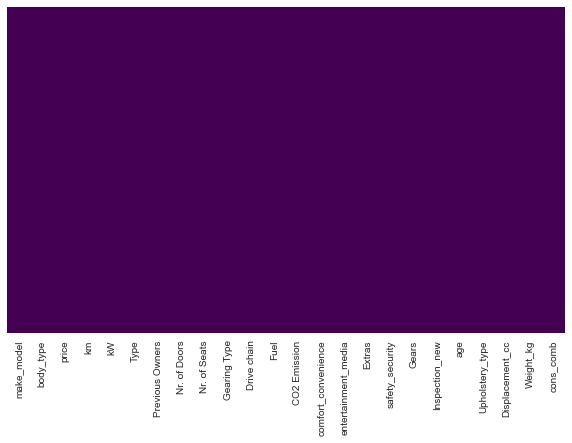

In [102]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [103]:
df.to_csv("filled_Null_AutoScout.csv", index=False)

------------------------------------
END OF THE PART - 2 : HANDLING WITH MISSING VALUES